# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

<class 'pandas.core.frame.DataFrame'>
Average Price: 10178.4886
Maximum Price: 31811.0
Minimum Price: 2112.0


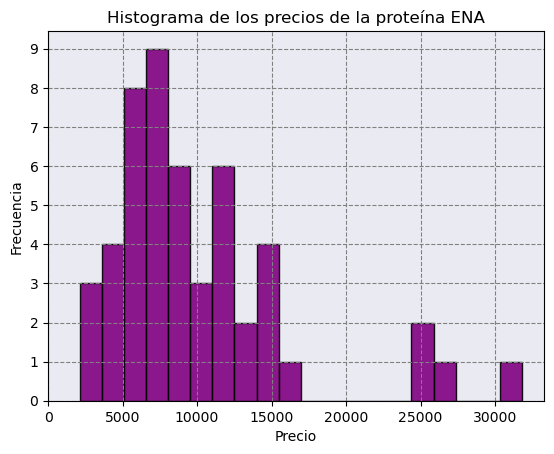

Maximum Price: 31811.0
Producto con el precio más alto de la búsqueda:  Star Nutrition | - Premium Whey Protein (proteína)  - 3kg Sabor Cookies And Cream


In [2]:
# Ejercicio 1

import requests
import pandas as pd
import matplotlib.pyplot as plt


buscar = "Proteína ENA" # Buscamos suplemento de Proteína ENA.
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20")) # interactuamos con la API de Mercado Libre con el formato adecuado.

response = requests.request("GET", url) # Hacemos el pedido o request y obtenemos la response


# Ejercicio 2

data = response.json() # Formateamos la respuesta a JSON, y luego a data frame con el paquete de pandas.
df = pd.DataFrame(data['results'])

df

print(type(df)) # Verificamos que efectivamente se trate de un data frame.

df['price'] = pd.to_numeric(df['price']) # Extraemos los precios del data frame de los resultados, y formateamos a valor numérico para poder calcularle el máximo, mínimo y promedio.

average_price = df['price'].mean() # Calculamos el promedio.
max_price = df['price'].max() # Calculamos el máximo.
min_price = df['price'].min() # Calculamos el mínimo.

print(f"Average Price: {average_price}")
print(f"Maximum Price: {max_price}")
print(f"Minimum Price: {min_price}")

# Ejercicio 3

# Usando la librería MatPlotLib, realizamos un histograma.

plt.hist(df['price'], bins=20, edgecolor='black', color='purple', alpha=0.9) # Definimos la variable a plotear y ajustamos los colores de las barras del histograma según nuestras preferencias.
plt.grid(True) # Para que se muestren las gridlines.
plt.grid(True, linestyle='--', color='gray')  # Cambiamos el formato de las gridlines.
plt.yticks(range(0, 10, 1)) # Definimos la escala del eje de las ordenadas.
plt.xticks(range(0, 35000, 5000)) # Definimos la escala del eje de las abscisas.
plt.xlabel('Precio') # Nombramos a las ordenadas.
plt.ylabel('Frecuencia') # Nombramos a las abscisas.
plt.title('Histograma de los precios de la proteína ENA') # Le ponemos título al gráfico.
plt.gca().set_facecolor('#EAEAF2')  # Cambiamos el fondo a negro

plt.show()

# Vemos que hay un outlier, así que lo identificamos.

max_price = df['price'].max()

print("Maximum Price:", max_price) # Obtenemos el valor máximo.

max_price_index = df['price'].idxmax() # Identificamos el índice de ese máximo, que luego nos permitirá conseguir su nombre.

product_name = df.at[max_price_index, 'title']  # Con el índice, buscamos el nombre del producto con el precio máximo en la columna 'title' del data frame obetnido.

print("Producto con el precio más alto de la búsqueda: ", product_name)